<a href="https://colab.research.google.com/github/msivakumar47/SIVAKUMAR-M/blob/main/k_means_project13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K  | Train Acc | Test Acc | Prediction Time (sec)
--------------------------------------------------
 1 |   1.000    |   0.967   |    0.1662
 3 |   0.942    |   1.000   |    0.2358
 5 |   0.958    |   1.000   |    0.2200
 7 |   0.958    |   1.000   |    0.2238
 9 |   0.950    |   1.000   |    0.2297
11 |   0.958    |   1.000   |    0.2235
13 |   0.958    |   1.000   |    0.2113
15 |   0.958    |   1.000   |    0.2075


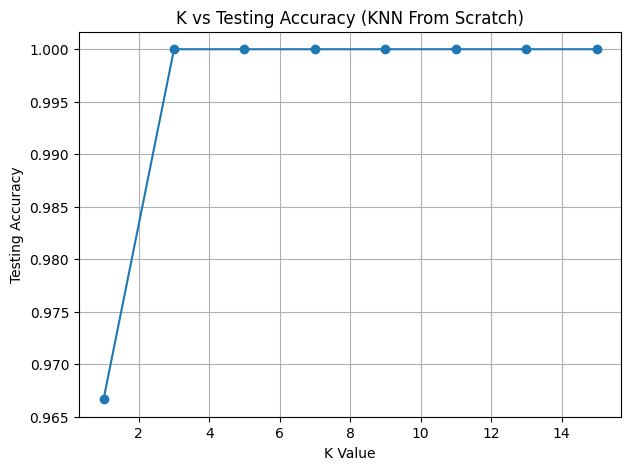

In [2]:
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# ===========================================
# 1. KNN FROM SCRATCH (Improved Version)
# ===========================================

class MyKNN:
    def __init__(self, k=3):
        self.k = k

    def distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict_one(self, x):
        distances = []
        for i in range(len(self.X_train)):
            dist = self.distance(x, self.X_train[i])
            distances.append((dist, self.y_train[i]))

        distances.sort(key=lambda x: x[0])
        neighbors = distances[:self.k]
        labels = [label for _, label in neighbors]
        return max(set(labels), key=labels.count)

    def predict(self, X_test):
        preds = []
        for x in X_test:
            preds.append(self.predict_one(x))
        return np.array(preds)

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)


# ===========================================
# 2. LOAD + SCALE + SPLIT
# ===========================================

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


# ===========================================
# 3. TEST K VALUES + ACCURACY + PREDICTION TIME
# ===========================================

k_values = list(range(1, 16, 2))  # 1,3,5,...15
results = []

train_acc_list = []
test_acc_list = []
time_list = []

print("K  | Train Acc | Test Acc | Prediction Time (sec)")
print("--------------------------------------------------")

for k in k_values:
    model = MyKNN(k=k)
    model.fit(X_train, y_train)

    # Measure ONLY prediction time (examiner requirement)
    start = time.time()
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    end = time.time()
    pred_time = end - start

    train_acc = model.accuracy(y_train, y_pred_train)
    test_acc = model.accuracy(y_test, y_pred_test)

    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)
    time_list.append(pred_time)

    results.append((k, train_acc, test_acc, pred_time))

    print(f"{k:>2} |   {train_acc:.3f}    |   {test_acc:.3f}   |    {pred_time:.4f}")


# ===========================================
# 4. PLOT ACCURACY vs K
# ===========================================

plt.figure(figsize=(7,5))
plt.plot(k_values, test_acc_list, marker='o')
plt.xlabel("K Value")
plt.ylabel("Testing Accuracy")
plt.title("K vs Testing Accuracy (KNN From Scratch)")
plt.grid(True)
plt.show()
